# Interrupted time series - with no additional predictor variables

In [18]:
import arviz as az
import matplotlib.pyplot as plt
import pandas as pd

from causal_impact.simulate_data import generate_time_series_data_simple
from causal_impact.models import LinearModel

In [19]:
az.style.use("arviz-darkgrid")
%config InlineBackend.figure_format = 'retina'

In [20]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load dataset

In [21]:
df = pd.read_csv("../causal_impact/data/its_simple.csv")
df.set_index("date", inplace=True)
treatment_time = "2017-01-01"

# SPLIT INTO OBSERVED PRE-TREATMENT DATA
data = (df[df.index < treatment_time]
        .loc[:,["intercept", "linear_trend", "timeseries"]])

# SPLIT INTO OBSERVED POST-TREATMENT DATA
predict_data = (df[df.index >= treatment_time]
                .loc[:,["intercept", "linear_trend", "timeseries"]])

## Using scikit-learn models

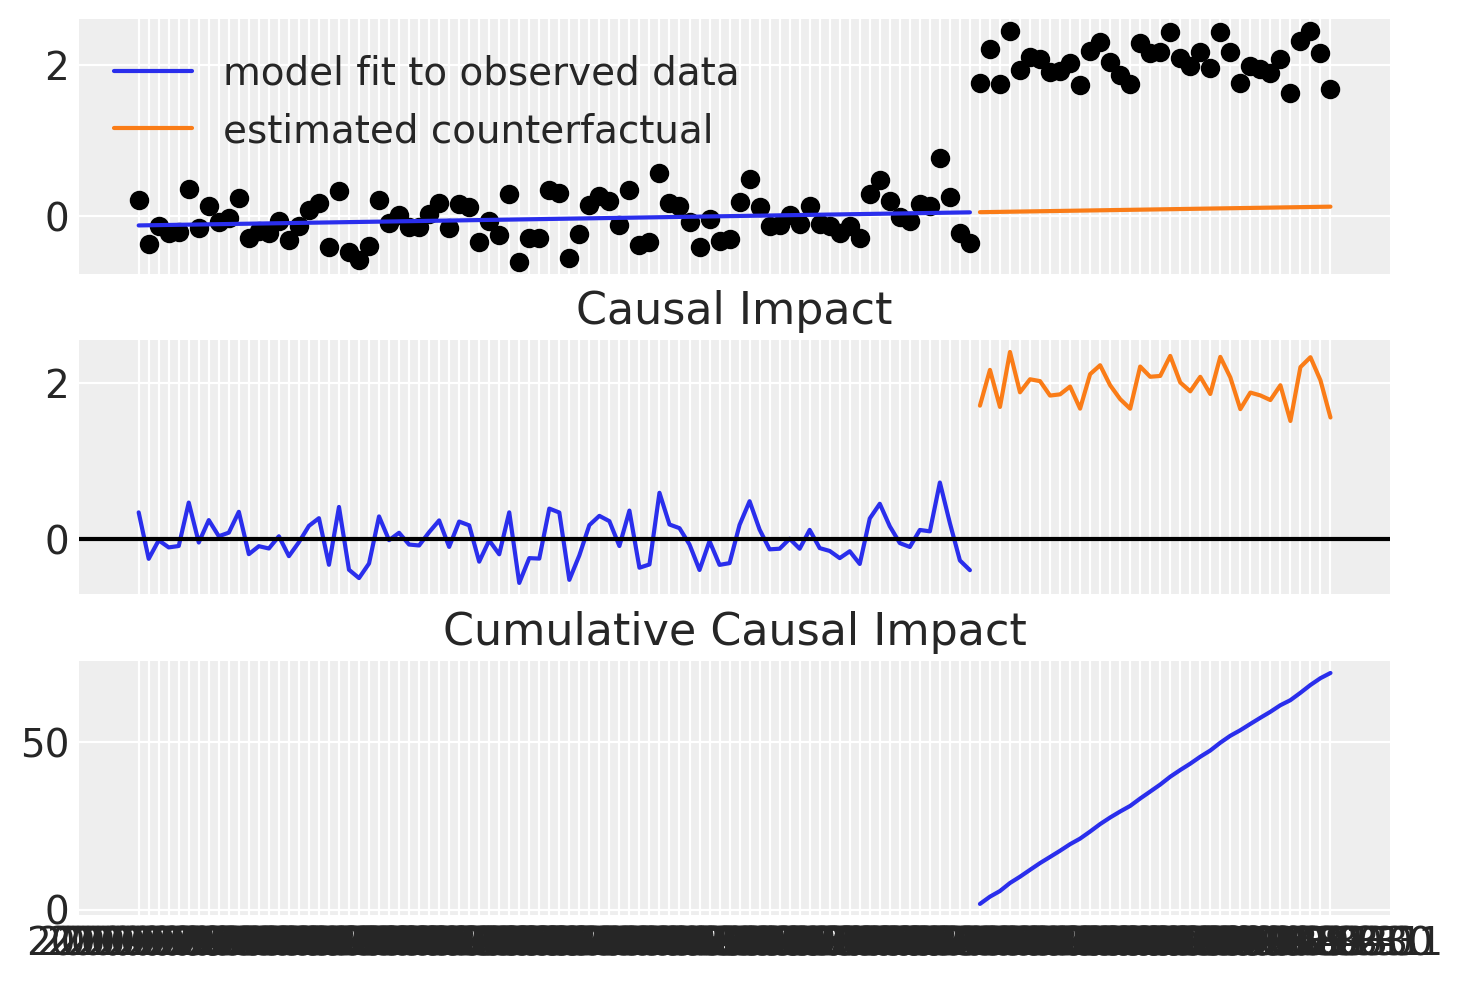

In [22]:
from causal_impact.skl import InterruptedTimeSeries
from sklearn import linear_model

model = linear_model.LinearRegression()
thing = InterruptedTimeSeries(data, predict_data, prediction_model=model)

thing.plot()

## Load dataset

In [43]:
# treatment_time = "2017-01-01"
# df = generate_time_series_data_simple(treatment_time, slope=0.0)
# df.to_csv('../causal_impact/data/its_simple.csv', index=True)
# df

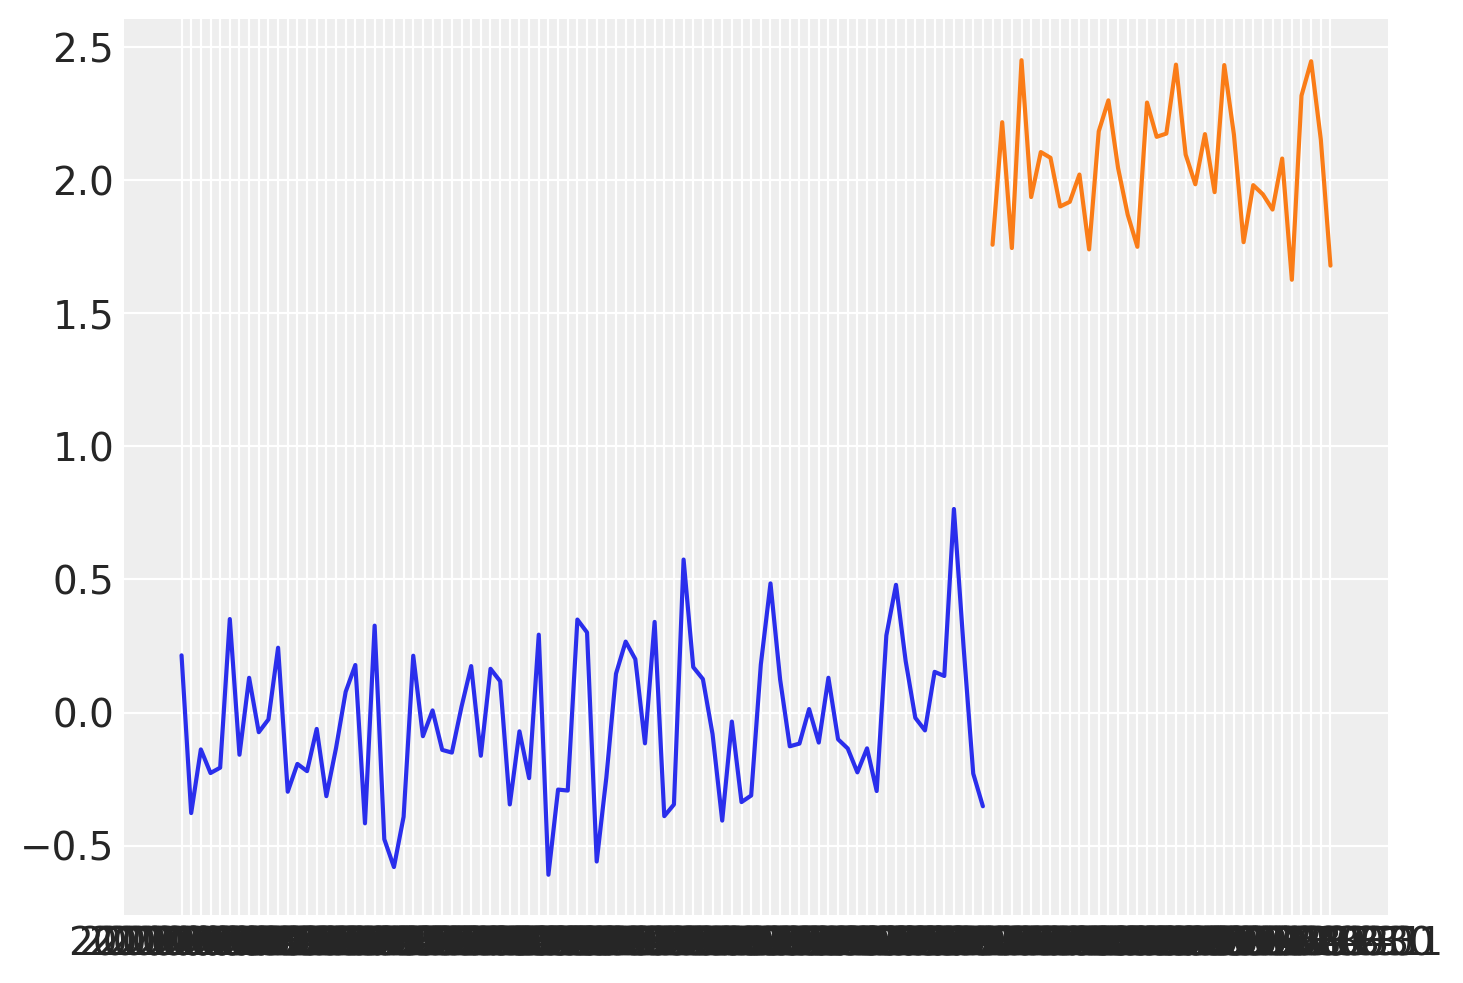

In [52]:
df = pd.read_csv("../causal_impact/data/its_simple.csv")
df.set_index("date", inplace=True)
treatment_time = "2017-01-01"

# SPLIT INTO OBSERVED PRE-TREATMENT DATA
data = (df[df.index < treatment_time]
        .loc[:,["intercept", "linear_trend", "timeseries"]])

# SPLIT INTO OBSERVED POST-TREATMENT DATA
predict_data = (df[df.index >= treatment_time]
                .loc[:,["intercept", "linear_trend", "timeseries"]])

# plot
fig, ax = plt.subplots()
ax.plot(data.index, data['timeseries'])
ax.plot(predict_data.index, predict_data['timeseries']);

## Build model

In [58]:
model_config = {"predictor_vars":  ["intercept", "linear_trend"], 
                "target_var": "timeseries"}

sampler_config = {}

model = LinearModel(model_config, sampler_config, data)

## Fit

In [59]:
model.idata = model.fit()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 7 seconds.
The acceptance probability does not match the target. It is 0.8922, but should be close to 0.8. Try to increase the number of tuning steps.


## Post-treatment prediction

In [60]:
# PREDICTION
forecast = model.predict(predict_data)

AttributeError: 'dict' object has no attribute 'constant_data'

## Visualise results

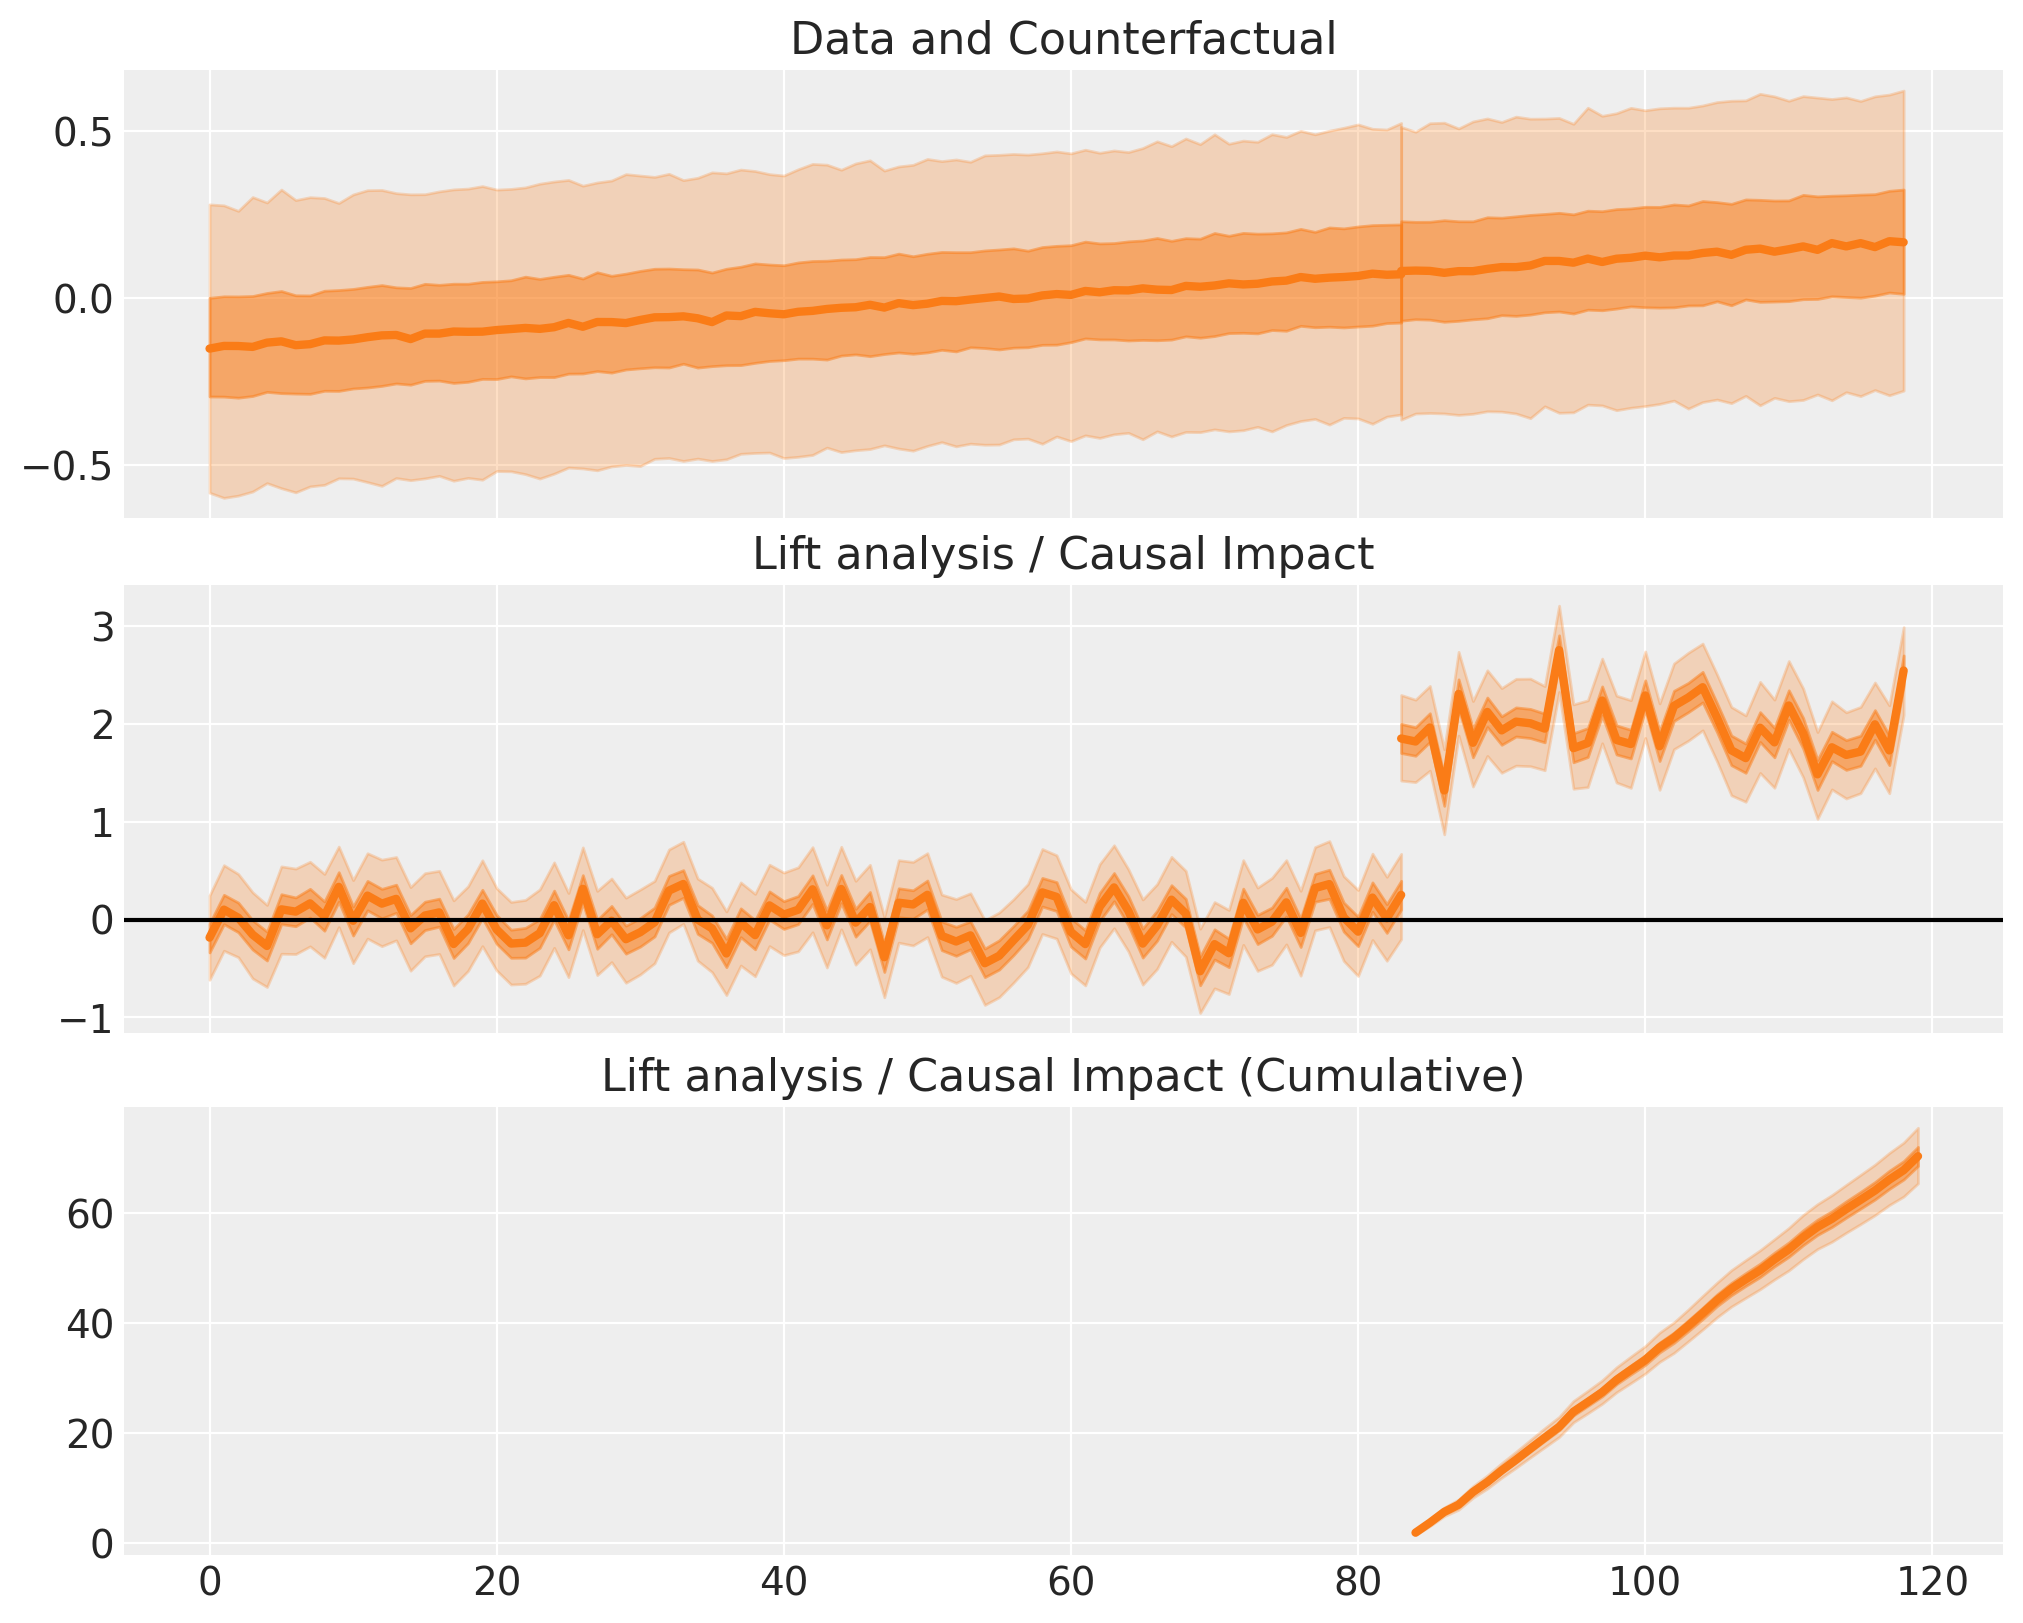

In [ ]:
model.plot()

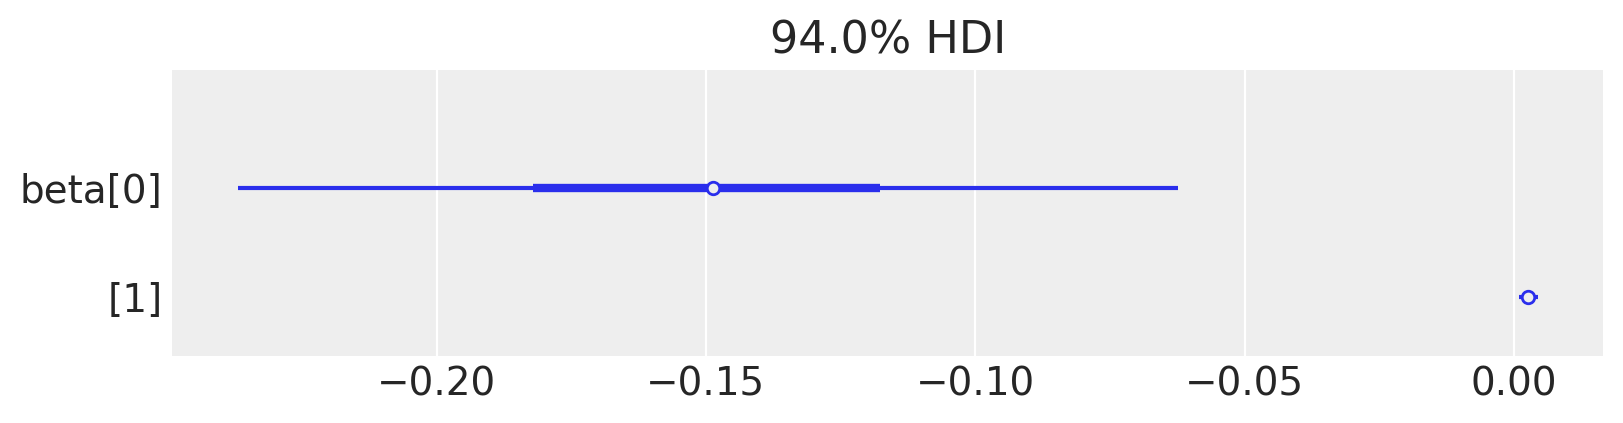

In [ ]:
az.plot_forest(model.idata.posterior, var_names="beta", figsize=(8, 2), combined=True);

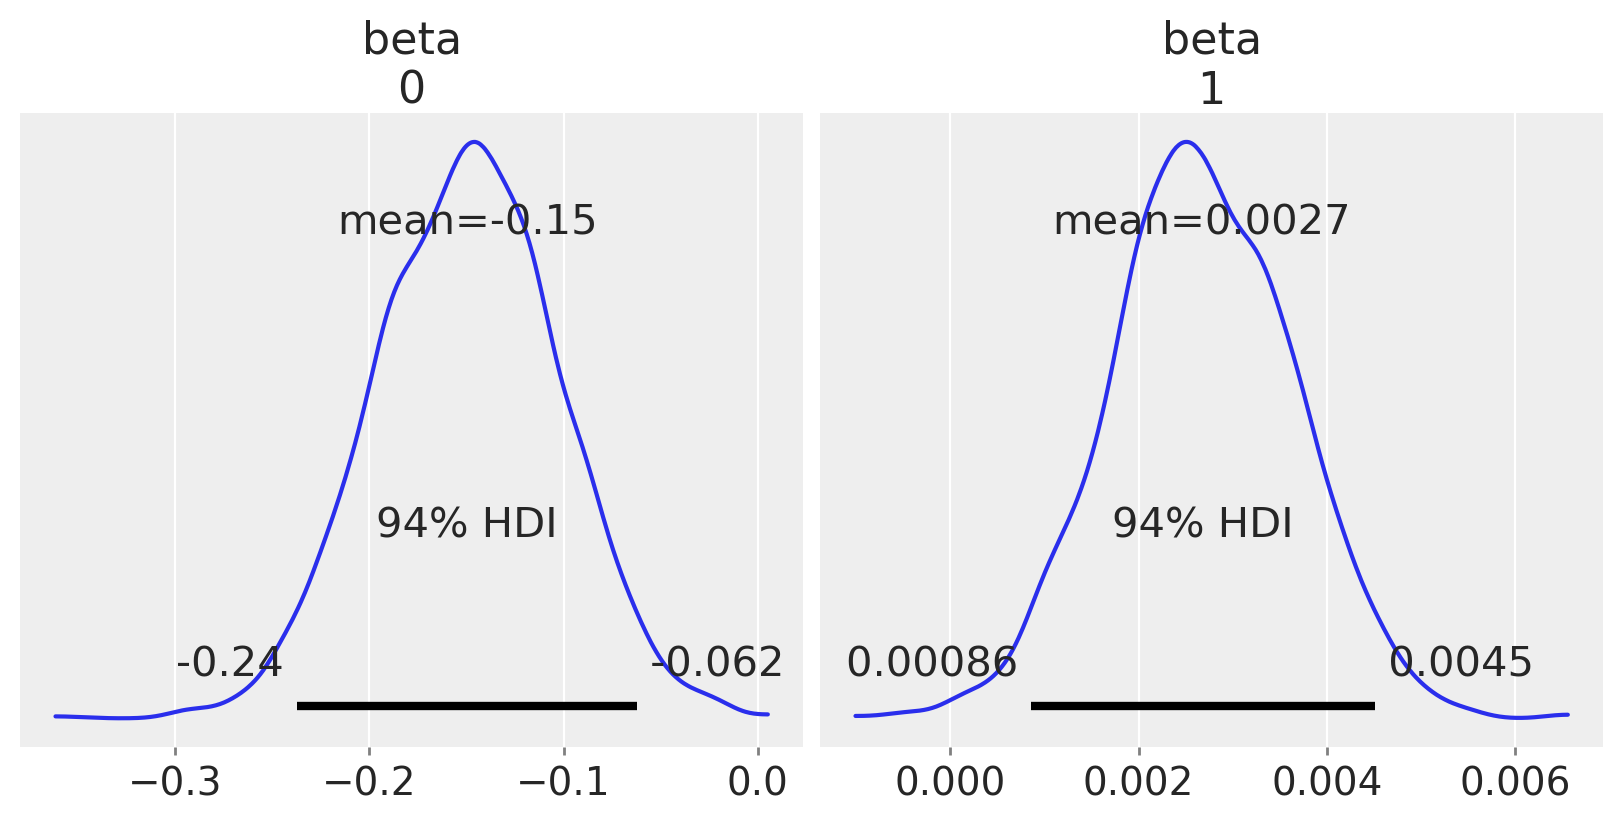

In [ ]:
az.plot_posterior(model.idata.posterior['beta'], figsize=(8, 4));

## Scikit learn

In [95]:
from sklearn import linear_model

X = data["linear_trend"].values.reshape(-1, 1)
y = data["timeseries"].values

reg = linear_model.LinearRegression()
reg.fit(X=X, y=y)

LinearRegression()

In [98]:


# predictions for pre-intervention
y_pred = reg.predict(X=X)

# counterfactural, predictions for post-intervention
X2 = predict_data["linear_trend"].values.reshape(-1, 1)
y_counterfactual = reg.predict(X=X2)


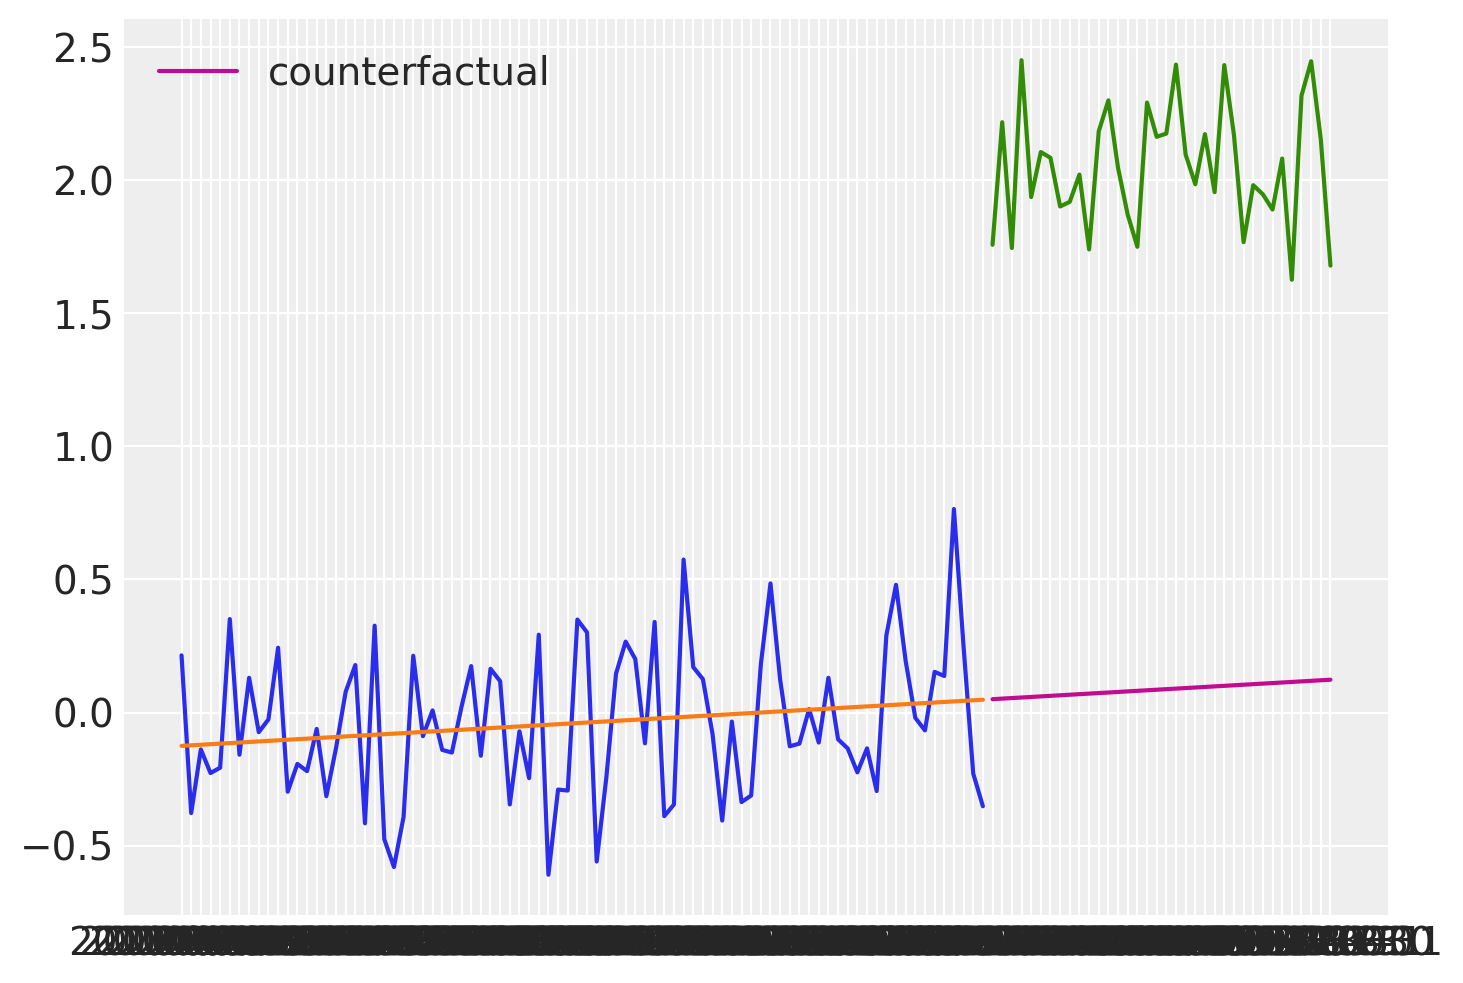

In [99]:
fig, ax = plt.subplots()

# pre
ax.plot(data.index, data['timeseries'])
ax.plot(x, y_pred)

# post
ax.plot(predict_data.index, predict_data['timeseries'])
ax.plot(x_counterfactual, y_counterfactual, label="counterfactual")

ax.legend();